PHAS0029 Session 5: Advanced plotting

_Updated: 02/02/2022_

## Intended learning outcomes
In this session we'll be looking at how to plot two-dimensional data. At the end of this session, you should be able to:
<ul>
 <li> Produce density plots and contour plots of two-dimensional scalar data
 <li> Produce quiver and stream plots of two dimensional vector data
 <li> Choose appropriate representations of data
 <li> Using these techniques, extend your understanding of key concepts from electrostatics
 </ul> 

# Image mapping - density plots
We've already looked at "standard" plots - with data points or lines on a plot with an x- and y-axis. Now we're going to look at another type of plot, where the data set consists of a grid of data, which we can plot in two dimensions, using colour to indicate the data values. These are sometimes known as density plots.



We'll start by looking at a simple example - we'll load a data file from an [Scanning Tunnelling Microscope](http://en.wikipedia.org/wiki/Scanning_tunneling_microscope) experiment, which measures the structure of a surface at the atomic scale (some of you will have the opportunity to do a similar experiment in Lab 3).




To start, we'll import numpy and matplotlib, exactly as we did before.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

We'll use np.loadtxt to load the data values from the file into an array, and then use the `np.shape` function to find out what shape the array is.

In [2]:
stmarray = np.loadtxt('stm.txt')

print (np.shape(stmarray))

(384, 384)


We can see that this is a two-dimensional array, with 384 columns and 384 rows. The matplotlib command to plot the array as an image is `plt.imshow`. You can find the full documentation at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html, but we'll just stick to the basics here.

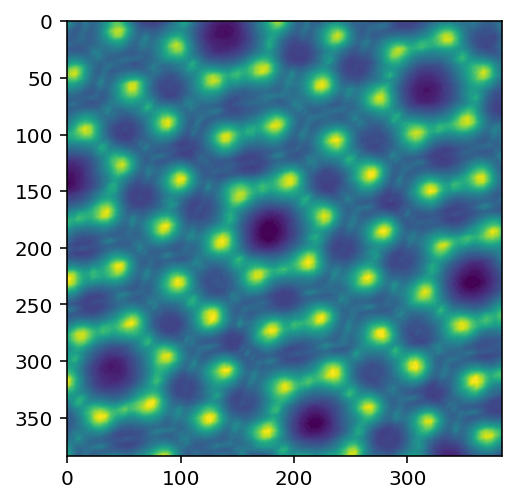

In [3]:
plt.figure()
plt.imshow(stmarray); # default colours - varies according to local setup
# plt.imshow(stmarray, cmap="gray"); # specify greyscale image

This has now produced a beautiful image of the atomic structure of the (111) silicon surface! 

A few things to note here. 

* Firstly, we can see that we have numbered axes - but by default, the origin is at the <i>top left</i>, not the bottom left as you might expect for a plot. In fact the default is to treat the image as a <i> <b>matrix</b></i>, where the [0,0] element is at the top left, and with the row index (i.e. the vertical, or $y$ component) first. You can move the origin to the bottom left using the <tt>origin="lower"</tt> option of imshow, but you still have to remember that the components are given as $(y,x)$, not $(x,y)$.

* The default on Desktop@UCL machines is to show the image as greyscale and on CoCalc it is full colour, but there are lots of other options available - see https://matplotlib.org/stable/gallery/color/colormap_reference.html for a full list, and https://matplotlib.org/stable/tutorials/colors/colormaps.html for detailed information on choosing appropriate colour maps.

* A colorbar is often useful to be able to map a colour back to its numerical value - use <tt>plt.colorbar</tt> to do this.

Here's the same array replotted with different settings to see this in practice:

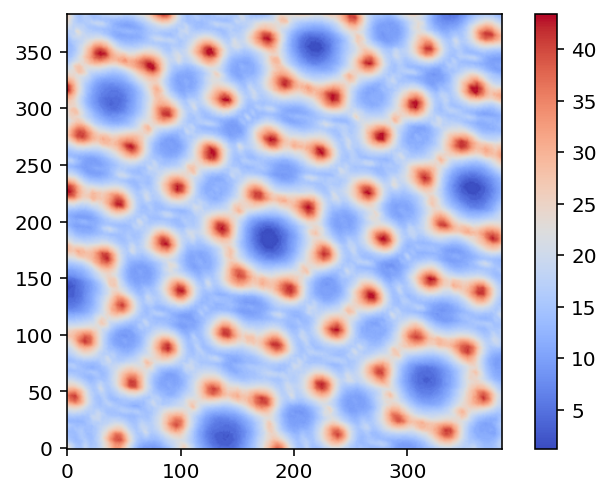

In [4]:
# Replot the information with the origin at the bottom left, and using a different colormap 
plt.figure()
plt.imshow(stmarray,origin="lower",cmap="coolwarm") 
plt.colorbar();                   # plots a bar indicating which value is mapped to which colour

## **Task 1**: Plot a colormap
*approx. 15 min*
<div class="alert alert-success"> 
Now it's your turn. 

<br>In your asignment directory you should have a file named "imgdatatest.dat". This file contains data points delimited by commas. Your job is to:
<ul>

<li>Load the file into an array and determine its shape</li>
<li>Plot the array, choosing an appropriate position for the origin, and a colormap that displays the information in the array appropriately (to determine this, you will need to figure out what the array represents!)</li>
<li>In the second code cell, replot the array using a different colormap. Experiment with the colormap and find one that <b>minimizes</b> the information in the array (i.e. one that is not at all visually appropriate - so that you can't tell what the image represents at all!)</li>
</ul>
</div>

(200, 141)


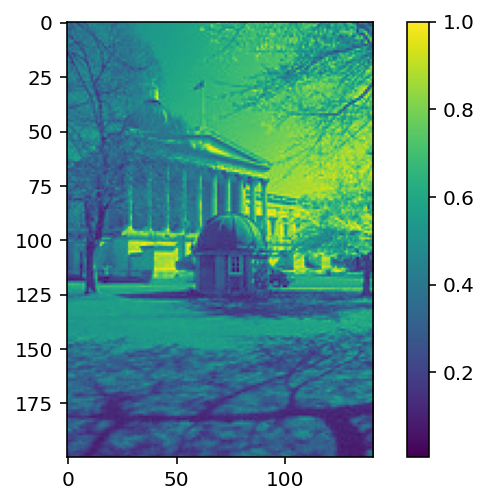

In [5]:
#loading the contents of 'imgdatatest.dat' into an array
imgarray = np.loadtxt('imgdatatest.dat', delimiter = ",")

#determining the shape the array
print(np.shape(imgarray))

plt.figure()

plt.imshow(imgarray); # plotting the array
plt.colorbar();  # plots a bar indicating which value is mapped to which colour

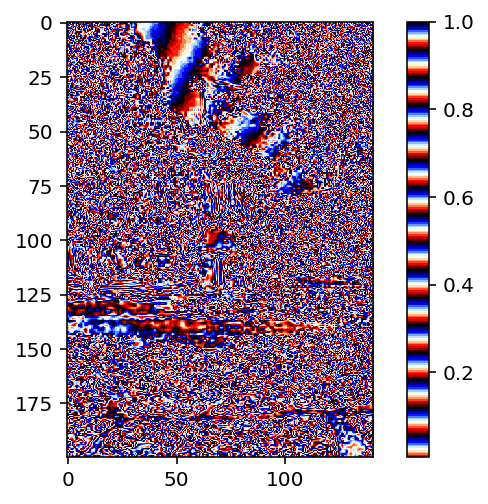

In [6]:
plt.figure()

plt.imshow(imgarray, cmap = "flag"); # plotting the array. From trial n error I found that colormap = "flag" minimizes the information in the array the most, i.e. it distorts the visibility of the image the most.

plt.colorbar();  # plots a bar indicating which value is mapped to which colour

# Plotting contours
Now we'll look at another sort of two dimensional plot. In the third section, we'll look at a way of plotting vector fields, but we'll start here by plotting some scalar fields.

In physics we often encounter both scalar and vector fields. In this session we'll be using examples from electrostatics that you will be familiar with from PHAS0021 (Electricity and Magnetism) that most of you did last term.


## Creating a mesh of grid values
As we've seen, if we want to make plots in a two-dimensional space, we need a *grid* of x and y values. When we were plotting data files, in the examples above, this was done automatically (the data was already saved in a two-dimensional format).

If we don't have this kind of data, then Numpy has a function to create a 2d grid for us: [mgrid](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mgrid.html). Look at how this works:



In [7]:
step = 0.2
y,x= np.mgrid[0:1:step, 0:1:step] # note we have y,x not x,y
print(" x is: \n", x)
print(np.shape(x))
print(" y is : \n", y)
print(np.shape(y))

 x is: 
 [[0.  0.2 0.4 0.6 0.8]
 [0.  0.2 0.4 0.6 0.8]
 [0.  0.2 0.4 0.6 0.8]
 [0.  0.2 0.4 0.6 0.8]
 [0.  0.2 0.4 0.6 0.8]]
(5, 5)
 y is : 
 [[0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8]]
(5, 5)


This produces *two* 2d arrays - one for the x values, one for the y values. 
As before, we use matrix-like ordering, with the rows (y-values) as the first element and the columns (x-values) as the second. The data point $(x=0.4, y = 0.8)$ is therefore represented by the element in the final (fifth) row and third column.

Using standard Python indexing, where we start at zero not one, we look at an individual element, for example

In [8]:
print(x[4,2], y[4,2])

0.4 0.8


We can see that the element in the fifth row (python index 4) and third column (python index 2) corresponds to x = 0.4 and y = 0.8, i.e. we're mapping the two-dimensional grid onto values of x and y.

## Example: point charge

As an example for this, we're going to look at a standard example from electromagnetism that's useful to be able to visualise - the equipotential and electric field for a point charge.

The electric potential $V$ due to a point charge $Q$ is given by
$$
V = \frac{Q}{4\pi\varepsilon_0 r}
$$
where $r = |\mathbf{r}|$ is the distance between the point at which we are measuring the potential  and the position of the charge.

For these purposes, we'll work in convenient units where $1/(4\pi\varepsilon_0) = 1$, and we'll put a point charge of magnitude 1 at a position $\mathbf{r} = (1,0)$:

In [9]:
qpos = [1,0] # point charge at position x, y
q = 1        # charge is positive, magnitude 1

# now we'll create the 2d grid:
gridsize = 60j # using a complex number ensures we include the final point. See mgrid documentation.
y,x = np.mgrid[-10:10:gridsize, -10:10:gridsize] # create our grid
print("The grid of x points has shape", np.shape(x))
print("The grid of y points has shape", np.shape(y))

The grid of x points has shape (60, 60)
The grid of y points has shape (60, 60)


## **Task 2**: Calculating potential
*approx. 15 min*
<div class="alert alert-success">
In the cell below, write a properly formatted and documented python <b>function</b> named "<tt>potential</tt>" that takes as its inputs:<ul>
<li>the coordinates $x$ and $y$, </li>
    <li>the position of the charge, and</li>
<li>the charge value and sign;</li>
</ul>

and calculates and returns the electric potential $V$ for a point charge of that magnitude at that position in terms of $x$ and $y$.

<br>(<i>Hint: work out the expression for $1/|\mathbf{r}|$ in terms of the variables x, y and charge position using a pen and paper before trying to code it</i>)
<br>(<i>Another hint: remember we're working in units where $1/(4\pi\varepsilon_0) = 1$</i>)
        
    
</div>

In [10]:
def potential(x,y,charge_pos,charge):
    
    '''
    Function that calculates and returns the electric potential for a point charge.
    
    Input: x-coordinate [x], y-coordinate [y], position of the charge [charge_pos], charge (value + sign) [charge]
    Output: electric potential [potential]
    '''
    
    #calculating the electric potential of a point of magnitude 'charge' located at position 'charge_pos' relative to an arbitrary point of position x and y
    potential = charge/np.sqrt(( x-charge_pos[0] )**2 + ( y-charge_pos[1] )**2)
    
    return potential

In [11]:
%run -i c5checkpoint1.py

************
 Well done! All test passed. You can move to the next part of the task.
************


<Figure size 432x288 with 0 Axes>

The code cell below will call your function for our grid of x- and y- coordinates to calculate the electric potential due to the positive charge at `qpos`.

In [12]:
V = potential(x,y,qpos,q) # calculates whole grid/matrix of electric potentials for our positive charge

print(np.shape(V)) # check that you get an array output!

(60, 60)


Now we've calculated V, we can plot the equipotentials using the [plt.contour](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html) function. The cell below will do this for us.

The shape of our electric potential array V is (60, 60)


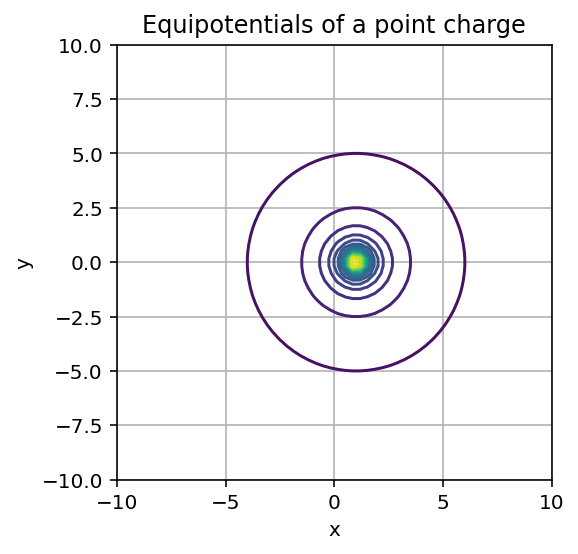

In [13]:
# The shape of V should be the same as the shape of x and y that we checked above.
print("The shape of our electric potential array V is", np.shape(V))

ncontours = 25 # the number of (equally spaced) contour lines to plot. Leave this out to just use the default value

# Plot the variable V on the grid defined by x and y, using ncontours contour lines.
plt.figure()
plt.contour(x,y,V,ncontours)

plt.grid()                 # include gridlines on the plot.
plt.axis('scaled')         # aspect ratio 1:1
plt.axis([-10,10,-10,10]) # specify xlim,ylim for the plot
plt.title("Equipotentials of a point charge")
plt.xlabel("x")
plt.ylabel("y");

If you have correctly calculated `V`, you should see concentric circles centred on the charge position given in `qpos`. Try changing `qpos` and check that the charge position on the plot moves.

Note that the contour lines aren't equally spaced on the plot - can you see why?

We can choose various different settings for the contours, and even combine this with the density plots from above, using plt.imshow. Experiment with the cell below to find the effect you feel best displays the data!

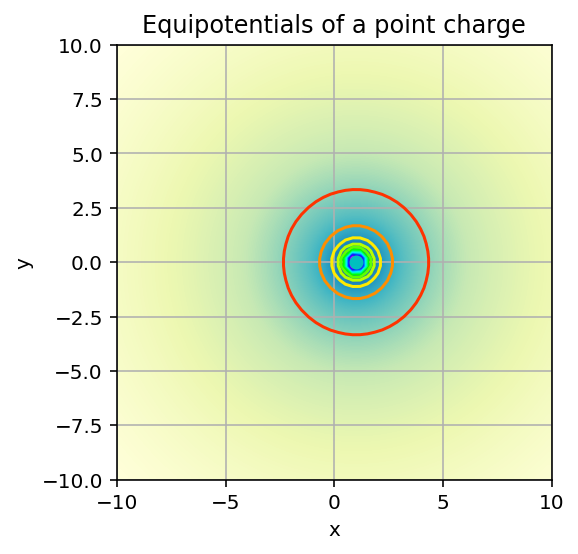

In [14]:
ncontours = 15 # the number of (equally spaced) contour lines to plot. Leave this out to just use the default value

plt.figure()
plt.contour(x,y,V,ncontours,cmap=plt.cm.gist_rainbow)
plt.imshow(np.log(V), interpolation='bilinear', origin='lower',
                cmap=plt.cm.YlGnBu, extent=(-10,10,-10,10))
plt.plot(qpos[0],qpos[1],"co")       # plot a small cyan circle at the position of the charge
plt.grid()
plt.axis('scaled')                   # aspect ratio 1:1
plt.axis([-10,10,-10,10])            # specify xlim,ylim
plt.title("Equipotentials of a point charge")
plt.xlabel("x")
plt.ylabel("y");

# Plotting Vector fields


Now we have the equipotentials sorted out, let's consider the electric field, which is of course a vector field. There are two ways of plotting vector fields in matplotlib, we'll look at both of them.

Before we can plot anything though, we need to calculate the electric field at each point on our grid of x and y values. This is given in a general form by
$$ \mathbf{E}(\mathbf{r}) = \frac{1}{4 \pi \varepsilon_0} \sum_i Q_i \frac{\mathbf{r_i}}{|\mathbf{r}_i|^3} $$

Here we're working in units where $1/(4\pi\varepsilon_0) = 1$, which simplifies things, and we only have a single charge. We need to calculate the vectors $\mathbf{r}$ though, which means our expression becomes

$$ \mathbf{E}(x,y) = q \frac{(x - q_x, y - q_y)}{\left[(x-q_x)^2 + (y-q_y)^2\right]^{3/2}} $$
where $(q_x, q_y) = $ `qpos`, and $q$ is the magnitude of the charge.

## **Task 3**: Electric field of a point charge
*approx. 20 min*
<div class="alert alert-success">
    You're going to write a python <b><i>function</i></b> to calculate the electric field due to a point charge. We will later use it to calculate fields for various arrangement of charges.
    
Name the function <tt>Epoint()</tt>. The function should take as its inputs:
<ul>
<li>The magnitude of the charge (usually $\pm 1$) </li>
    <li>The position of the charge, </li>
    <li><tt>x</tt> and <tt>y</tt> coordinates, to give the grid to calculate on. </li>
</ul>
It should output two arrays of the same size and shape as <tt>x</tt> and <tt>y</tt>, representing the electric field at these points.

Do this in the cell below. Remember to include an appropriate docstring for your function. Remember that your function should work for any arguments given as inputs.
</div>

In [15]:
def Epoint(charge, qposition, x, y):
    
    '''
    Function caculates the electric field due to a point charge.
    Input: magnitude of charge [charge], position of the charge [qposition], x-coordinate [x], y-coordinate [y]
    Output: x-component of electric field [Ex], y-component of electric field [Ey]
    '''
    
    #calculating the x-component of the electric field 
    Ex = charge * (x-qposition[0])/( (x-qposition[0])**2 + (y-qposition[1])**2 )**1.5
    
    #calculating the y-component of the electric field
    Ey = charge * (y-qposition[1])/( (x-qposition[0])**2 + (y-qposition[1])**2 )**1.5
    
    
    
    return Ex, Ey

In [16]:
%run -i c5checkpoint2.py

************
 Well done! All test passed. You can move to the next part of the task.
************


<Figure size 432x288 with 0 Axes>

Once you've written the function, we can use it to calculate the electric field. This cell will produce two arrays, one containing the x-components of the E-field and one the y-components, for our charge +1 at qpos. 

In [17]:
Ex, Ey = Epoint(1,qpos,x,y) # calculate the electric field

We can check the shape of the outputs - this should be the same as the shape of x and y. As well as the values of the field in the top left corner of the grid.

In [18]:
print("Shapes of our calculated field arrays:")
print(np.shape(Ex), np.shape(Ey))
print("Shapes of our grid arrays")
print(np.shape(x), np.shape(y))

print("Value of the electric field at top LH corner of grid:")
print(" x-component:", Ex[0,0], " y-component:", Ey[0,0])
print("Value of the electric potential at the same point:", V[0,0])

Shapes of our calculated field arrays:
(60, 60) (60, 60)
Shapes of our grid arrays
(60, 60) (60, 60)
Value of the electric field at top LH corner of grid:
 x-component: -0.0033481451284884333  y-component: -0.0030437682986258485
Value of the electric potential at the same point: 0.06726727939963124


We can see from this (if your function is working!) that the E-field is indeed a vector, and is pointing in a direction away from the position of the (positive) charge, exactly as we'd expect.

Now let's think about how we want to plot this information. As mentioned above, there are two ways of doing this.

## "Quiver" plot

For each point on our x,y grid, this function plots an arrow whose length and direction corresponds to the magnitude and direction of the vector field at that point. Let's see how this looks:


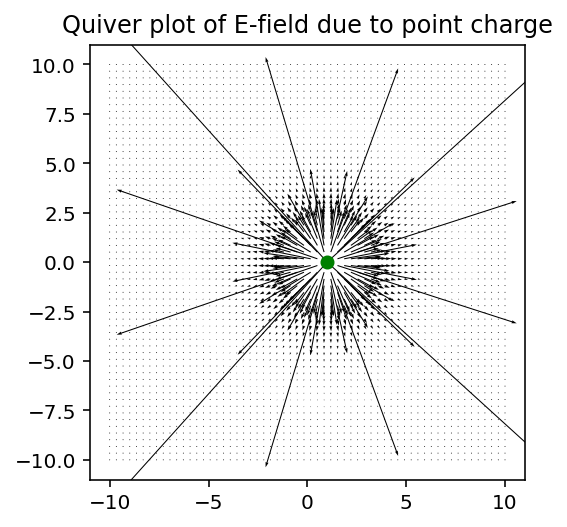

In [19]:
plt.figure()
plt.quiver(x,y,Ex,Ey)
plt.plot(qpos[0],qpos[1],"go") # plot a small green circle at the position of the charge
plt.axis('scaled')             # aspect ratio 1:1
plt.title("Quiver plot of E-field due to point charge");

We get a general idea of what the E-field looks like from this. As we can see, the longest arrows are those nearest the charge, while the arrows furthest from the charge position are almost single points. However,  it doesn't exactly look like the diagrams in an EM textbook!

Now let's try the second type of plot.

## "Stream" plot

The streamplot function plots the field lines themselves. This plot looks considerably more like a plot from an electromagnetism textbook - however, note that it plots the field lines at a constant density, so you can't take the density of the field lines as an indicator of the strength of the field at that point, like you would be able to normally.

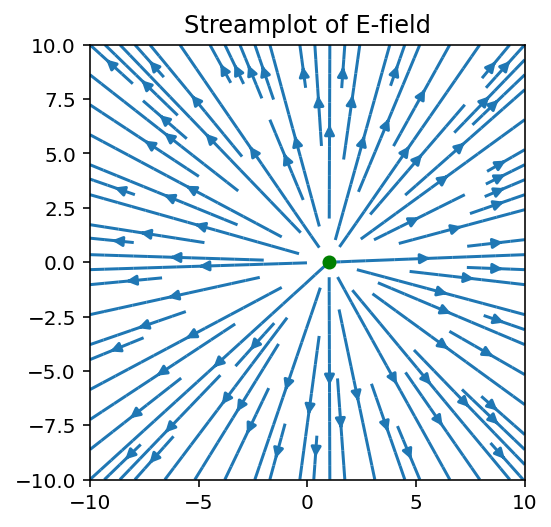

In [20]:
plt.figure()
plt.streamplot(x,y,Ex,Ey)
plt.plot(qpos[0],qpos[1],"go")
plt.axis('scaled')        # aspect ratio 1:1
plt.axis([-10,10,-10,10]) # specify xlim,ylim
plt.title("Streamplot of E-field");

We can extract more information from this data by using colour as an indicator of the field strength. In this cell, we calculate the magnitude of the field, and use that to colour the field lines appropriately. We choose to use the log of the magnitude, as the strength drops off quickly close to the origin.

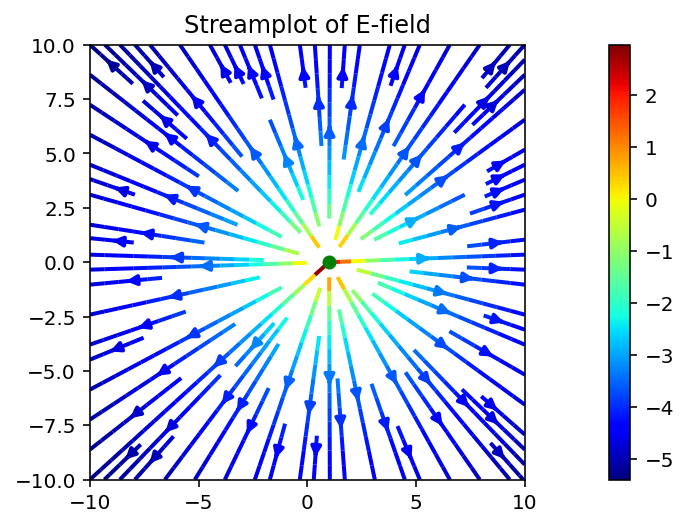

In [21]:
magnitude = np.sqrt(Ex**2 + Ey**2)    # magnitude of the electric field

plt.figure()
plt.streamplot(x,y,Ex,Ey,color=np.log(magnitude), linewidth=2, cmap=plt.cm.jet)
plt.plot(qpos[0],qpos[1],"go")
plt.colorbar()
plt.axis('scaled')                    # aspect ratio 1:1
plt.axis([-10,10,-10,10])             # specify xlim,ylim
plt.title("Streamplot of E-field");

## **Task 4**: Complete plot
*approx. 30 min*
<div class="alert alert-success">
    Create a function called <tt>plot_Efield</tt> that will combine all the instructions from above to give you a beautiful and well-formatted plot of an Electric field. 
    
Your function should plot any 2D Electric field given x and y components of the field, potential and x and y grids as the inputs. 
The plot should:
 - contain stream plot of the Electric field
 - use colour as an indicator of Electric field strength
 - contour plot for the corresponding electric potential
 - background shading indicating potential magnitude
 
 Make sure you also include the usual: title, labels and for 2D plots, colorbar.
</div>

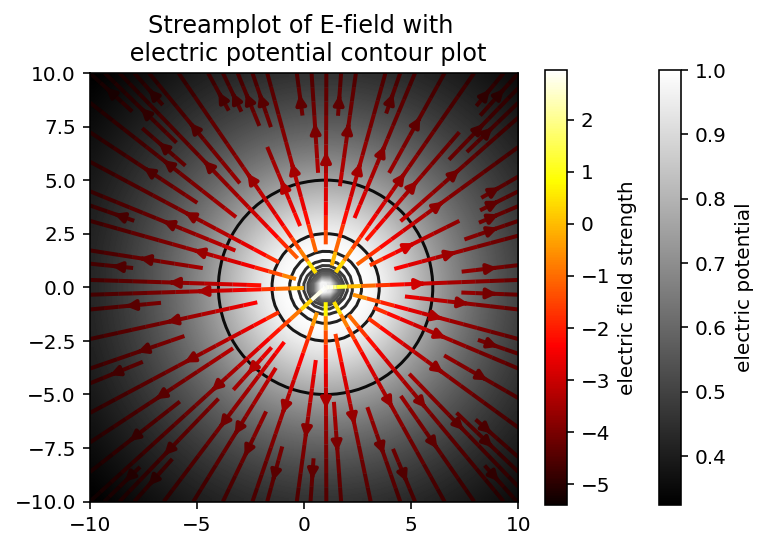

In [22]:
def plot_Efield(Ex, Ey, V, x, y):
    '''
    This function generates a well-formatted plot of a 2D Electric field.
    Input: x-component of Electric field [Ex], y-component of Electric field [Ey], potential [V], x-coordinates [x], y-coordinates [y]
    Output: N/A
    '''
    
    magnitude = np.sqrt(Ex**2 + Ey**2)    # magnitude of the electric field

    plt.figure()
    
    ncontours = 25 # the number of (equally spaced) contour lines to plot
    
    
    plt.contour(x,y,V,ncontours,cmap="gray") #contour plot of the electric potential with background shading of 'gray'
    
    plt.imshow(np.tanh(5*(V)), interpolation='bilinear', origin='lower', cmap="gray", extent=(-10,10,-10,10)) # plotting the array of the hyperbolic tangent of five times the electric potential values with colormap setting of 'gray'
    plt.colorbar(label='electric potential')    #colorbar indicating the electric potential


    

    plt.streamplot(x,y,Ex,Ey,color=np.log(magnitude), linewidth=2, cmap="hot") #streamplot of the electric field with a colormap setting of 'hot'
    
    plt.colorbar(label='electric field strength')    #colorbar indicating the electric field strength


    #plt.plot(qpos[0],qpos[1],"ro") # plot of a small red circle at the position of the point charge
        
    plt.axis('scaled')                    # aspect ratio 1:1
    plt.axis([-10,10,-10,10])             # specify xlim,ylim
    plt.title("Streamplot of E-field with \n electric potential contour plot");   #title of the whole figure
    
    

#the next line will call your function for the single charge field calculated before
plot_Efield(Ex,Ey,V,x,y)

## **Task 5**: An electric dipole
*approx. 30 min*
<div class="alert alert-success">

If all has gone well, you should now have everything in place to be able to calculate for an arbitrary arrangement of charges. 
<br><br>
    Create a function called <tt>dipole</tt> that <b>calculates and plots </b> Electric field of a dipole. For now, we will keep the first (positive) charge at $\mathbf{r} = (+1,0)$, and add a negative charge to the system at an arbitrary position.

Your function should take as arguments: x and y grids, value of the negative charge and its position. It should return x and y components of the Electric field as well as potential.
    
Use all of your functions created above to calculate the *total* E-field and electric potential, and plot them in the way you think is best. **Use text cells to describe the physics of what you observe.**
    
(<i>Hint: remember that the total E-field of a system will be given by the sum of the contributions from all the charges in the system</i>)<br>
(<i> Hint 2: although a physical dipole is an arrangement of two equal and opposite charges, your function should be able to plot Electric field also for unequal but opposite charges.</i>)
    
</div>

In [23]:
def dipole(x, y,q_negative, q_position):
    
    '''
    This function calculates and plots the electric field of a dipole.
    Input: x-coordinates [x], y-coordinates [y], value of a negative charge [q_negative], position of a negative charge [q_position]
    Output: x-component of the total electric-field [Ex_total], y-component of total electric-field [Ey_total], total electric potential [V_total]
    '''
    
    #first positive charge
    q = 1
    
    #position of first positivew charge
    qpos = [1,0]
    
    #ensuring that my second charge is always negative
    q_negative = - abs(q_negative)
    
    #calculating the total effective x-component of the electric field
    Ex_total = Epoint(q, qpos, x, y)[0] + Epoint(q_negative, q_position, x, y)[0]
    
    #calculating the total effective y-component of the electric field
    Ey_total = Epoint(q, qpos, x, y)[1] + Epoint(q_negative, q_position, x, y)[1]
    
    #calculating the total effective electric potential
    V_total = potential(x,y,qpos,q) + potential(x, y, q_position, q_negative)
    
    
    #plotting the electric field of the dipole along with the potential
    plot_Efield(Ex_total, Ey_total, V_total, x, y)
    
    return Ex_total, Ey_total, V_total 

In [24]:
%run -i c5checkpoint3.py

************
 Well done! All test passed. You can move to the next part of the task.
************


<Figure size 432x288 with 0 Axes>

YOUR ANSWER HERE

## **Task 6**: Beyond a dipole
*approx. 30 min*
<div class="alert alert-success">

Write additional code and text cells to add a third or fourth charge into the system. 
 <br>   
This is most interesting if you choose a <i>symmetric</i> arrangement of charges, rather than random positions. In particular, you may want to consider one or more of the following:<ul>   
   <li> a quadrupole arrangement, 
   <li> three charges in a line; or
   <li> three charges on three corners of a square. 
    </ul>
       
(Examples you've probably already seen in the Electricity and Magnetism lectures!)
    
Make sure you use your functions defined above to keep your code clear and efficient. Include enough text comments to show your understanding of the underlying physics and justify your choice of the charges arrangement.
</div>

## Plotting an electric quadrupole arrangement 

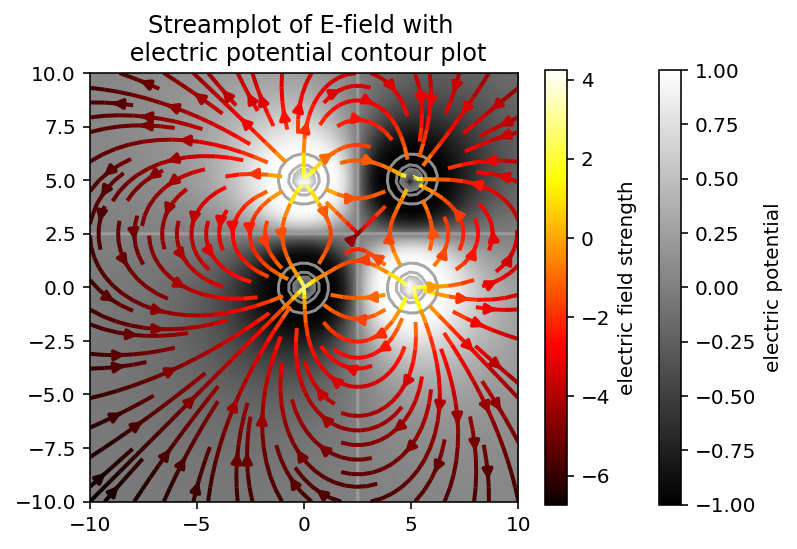

In [25]:
#first positive charge
q1 = 1
#position of first positivew charge
qpos1 = [5,0]
    
#second positive charge
q2 = 1
#position of second positive charge
qpos2 = [0,5]
    
#third positive charge
q3 = -1
#position of third postive charge
qpos3 = [0,0]
    
#fourth positive charge
q4 = -1
#position of the fourth postive charge
qpos4 = [5,5]
    

    
#calculating the total effective x-component of the electric field
Ex_total = Epoint(q1, qpos1, x, y)[0] + Epoint(q2, qpos2, x, y)[0] + Epoint(q3, qpos3, x, y)[0] + Epoint(q4, qpos4, x, y)[0]
    
#calculating the total effective y-component of the electric field
Ey_total = Epoint(q1, qpos1, x, y)[1] + Epoint(q2, qpos2, x, y)[1] + Epoint(q3, qpos3, x, y)[1] + Epoint(q4, qpos4, x, y)[1]
    
#calculating the total effective electric potential
V_total = potential(x,y,qpos1,q1) + potential(x, y, qpos2, q2) + potential(x, y, qpos3, q3) + potential(x, y, qpos4, q4)
    
#plotting the electric field of the dipole along with the potential
plot_Efield(Ex_total, Ey_total, V_total, x, y)

## Plotting three charges in a line

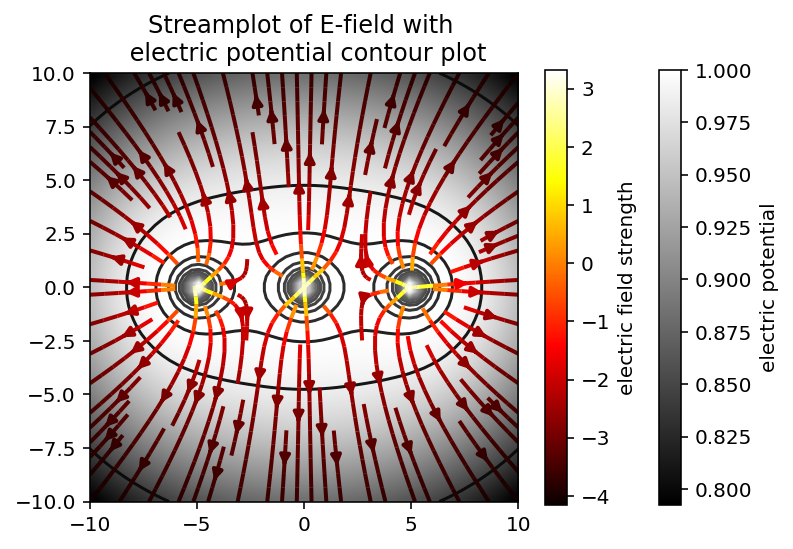

In [26]:
#first positive charge
q1 = 1
#position of first positivew charge
qpos1 = [-5,0]
    
#second positive charge
q2 = 1
#position of second positive charge
qpos2 = [0,0]
    
#third positive charge
q3 = 1
#position of third postive charge
qpos3 = [5,0]
    

   
#calculating the total effective x-component of the electric field
Ex_total = Epoint(q1, qpos1, x, y)[0] + Epoint(q2, qpos2, x, y)[0] + Epoint(q3, qpos3, x, y)[0] 
    
#calculating the total effective y-component of the electric field
Ey_total = Epoint(q1, qpos1, x, y)[1] + Epoint(q2, qpos2, x, y)[1] + Epoint(q3, qpos3, x, y)[1]
    
#calculating the total effective electric potential
V_total = potential(x,y,qpos1,q1) + potential(x, y, qpos2, q2) + potential(x, y, qpos3, q3)
    
#plotting the electric field of the dipole along with the potential
plot_Efield(Ex_total, Ey_total, V_total, x, y)

## Plotting three charges on three corners of a square

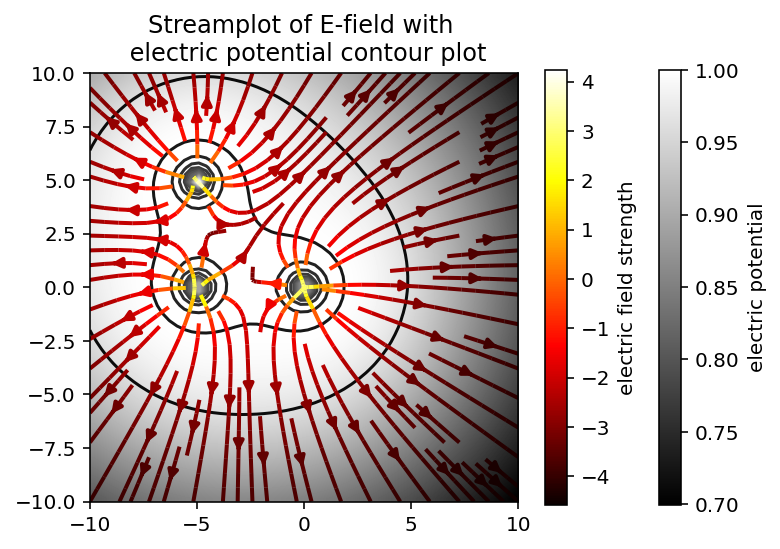

In [27]:
#first positive charge
q1 = 1
#position of first positive charge
qpos1 = [-5,0]
    
#second positive charge
q2 = 1
#position of second positive charge
qpos2 = [-5,5]
    
#third positive charge
q3 = 1
#position of third postive charge
qpos3 = [0,0]
    


    
#calculating the total effective x-component of the electric field
Ex_total = Epoint(q1, qpos1, x, y)[0] + Epoint(q2, qpos2, x, y)[0] + Epoint(q3, qpos3, x, y)[0] 
    
#calculating the total effective y-component of the electric field
Ey_total = Epoint(q1, qpos1, x, y)[1] + Epoint(q2, qpos2, x, y)[1] + Epoint(q3, qpos3, x, y)[1]
    
#calculating the total effective electric potential
V_total = potential(x,y,qpos1,q1) + potential(x, y, qpos2, q2) + potential(x, y, qpos3, q3)
    
#plotting the electric field of the dipole along with the potential
plot_Efield(Ex_total, Ey_total, V_total, x, y)

General quality of plots

General quality of docstrings and code comments

General quality of text cells